# QR Code and Bar Code Scanner using OpenCV

### Installing necessary files for QR Code Scanning

Please note, that some of the libraries used here might not work on Windows system. Even after googling for long, and going through multiple StackOverflow posts, I could not find a setup to make zbar work on Windows. If you are on Linux/Ubuntu/Mac, no need to worry!!

Workaround for Windows: Please shift to another OS or use Google Colab

References:
1. https://stackoverflow.com/questions/27233351/how-to-decode-a-qr-code-image-in-preferably-pure-python
2. https://pypi.org/project/zbarlight/

In [ ]:
!apt-get install libzbar0 libzbar-dev
!pip install zbarlight
!pip install pyzbar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libzbar-dev is already the newest version (0.10+doc-10.1build2).
libzbar0 is already the newest version (0.10+doc-10.1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
import os
import glob
import cv2
import numpy as np
from pyzbar.pyzbar import decode
from google.colab.patches import cv2_imshow

In [ ]:
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 200
    ratio = width/float(w)
    height = int(h*ratio)
    return cv2.resize(img, (height, width))

In [ ]:
with open('Registered.txt') as f:
    myDataList = f.read().splitlines()



File contains data: Debanjan Saha


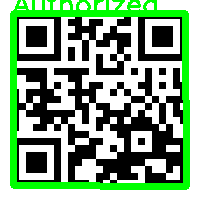



File contains data: github.com/debanjansaha-git


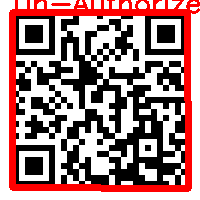



File contains data: Debanjan


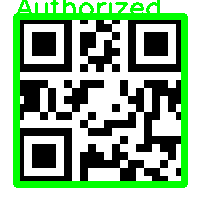



File contains data: Science Lover


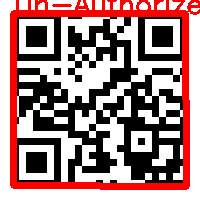



File contains data: 00001


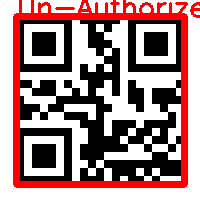



File contains data: Mad Scientist


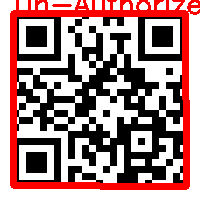



File contains data: GuestUser0001


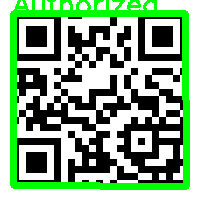



File contains data: GuestUser0003


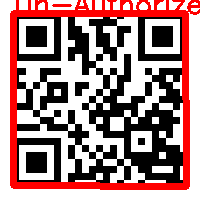



File contains data: GuestUser0002


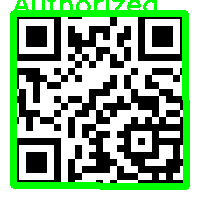

In [ ]:
image_dir = 'Data'

for file in glob.iglob(f'{image_dir}/*'):
    img = read_img(file)

    for barcode in decode(img):
        myData = barcode.data.decode('utf-8')
        myData = myData.split('://')[1]
        print(f'\n\nFile contains data: {myData}')

        if myData in myDataList:
            myOutput = 'Authorized'
            myColor = (0,255,0)
        else:
            myOutput = 'Un-Authorized'
            myColor = (0, 0, 255)

        pts = np.array([barcode.polygon],np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,myColor,5)
        pts2 = barcode.rect
        cv2.putText(img,myOutput,(pts2[0],pts2[1]),cv2.FONT_HERSHEY_SIMPLEX,
                    0.9,myColor,2)

    cv2_imshow(img)
